Nom 1: Guillem Calaf

Nom 2: Guillem Durán

# Repte 5: Gat o gos?

## Enunciat

En aquest repte crearem una **Xarxa Neuronal Convolucional** capaç de dir si una imatge correspon a la d'un gat o a la d'un gos.
Per poder fer això disposem d'un dataset format per 2000 fotos de gats i 2000 fotos de gossos. Aquest dataset es troba en [aquesta url](https://drive.google.com/file/d/1akESKTtn26-jiZGwMF1sVlDOMn8uQACu/view?usp=sharing).

### Pregunta 1
De quin tipus de problema es tracta?

In [21]:
# Descarrega el dataset. Aquest fitxer és un zip que pots descomprimir amb la llibreria zipfile

# Importem les llibreries necessàries
import zipfile
import os

# Descarreguem dataset en python
import gdown
url = 'https://drive.google.com/u/0/uc?id=1akESKTtn26-jiZGwMF1sVlDOMn8uQACu&export=download'
output = 'cats_and_dogs_small.zip'
gdown.download(url, output, quiet=False)

# Descomprimim
local_zip = 'cats_and_dogs_small.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('cats_and_dogs_small')
zip_ref.close()

Downloading...
From: https://drive.google.com/u/0/uc?id=1akESKTtn26-jiZGwMF1sVlDOMn8uQACu&export=download
To: c:\Users\informatica\Desktop\IABD\M03\repte-gatgos\cats_and_dogs_small.zip
100%|██████████| 91.0M/91.0M [00:10<00:00, 8.69MB/s]


In [22]:
# Defineix les variables train_dir, validation_dir, test_dir amb el path de
# cada un dels directoris que contenen les imatges corresponents

train_dir = 'cats_and_dogs_small/cats_and_dogs_small/train'
validation_dir = 'cats_and_dogs_small/cats_and_dogs_small/validation'
test_dir = 'cats_and_dogs_small/cats_and_dogs_small/test'

train_cats_dir = 'cats_and_dogs_small/cats_and_dogs_small/train/cats'
train_dogs_dir = 'cats_and_dogs_small/cats_and_dogs_small/train/dogs'
validation_cats_dir = 'cats_and_dogs_small/cats_and_dogs_small/validation/cats'
validation_dogs_dir = 'cats_and_dogs_small/cats_and_dogs_small/validation/dogs'
test_cats_dir = 'cats_and_dogs_small/cats_and_dogs_small/test/cats'
test_dogs_dir = 'cats_and_dogs_small/cats_and_dogs_small/test/dogs'


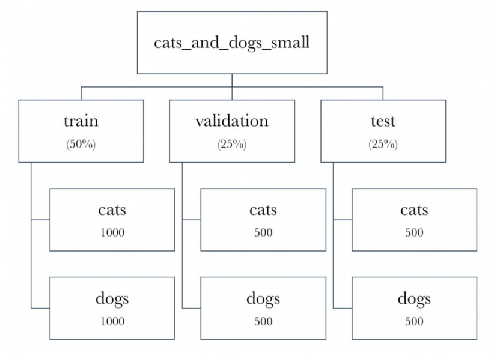

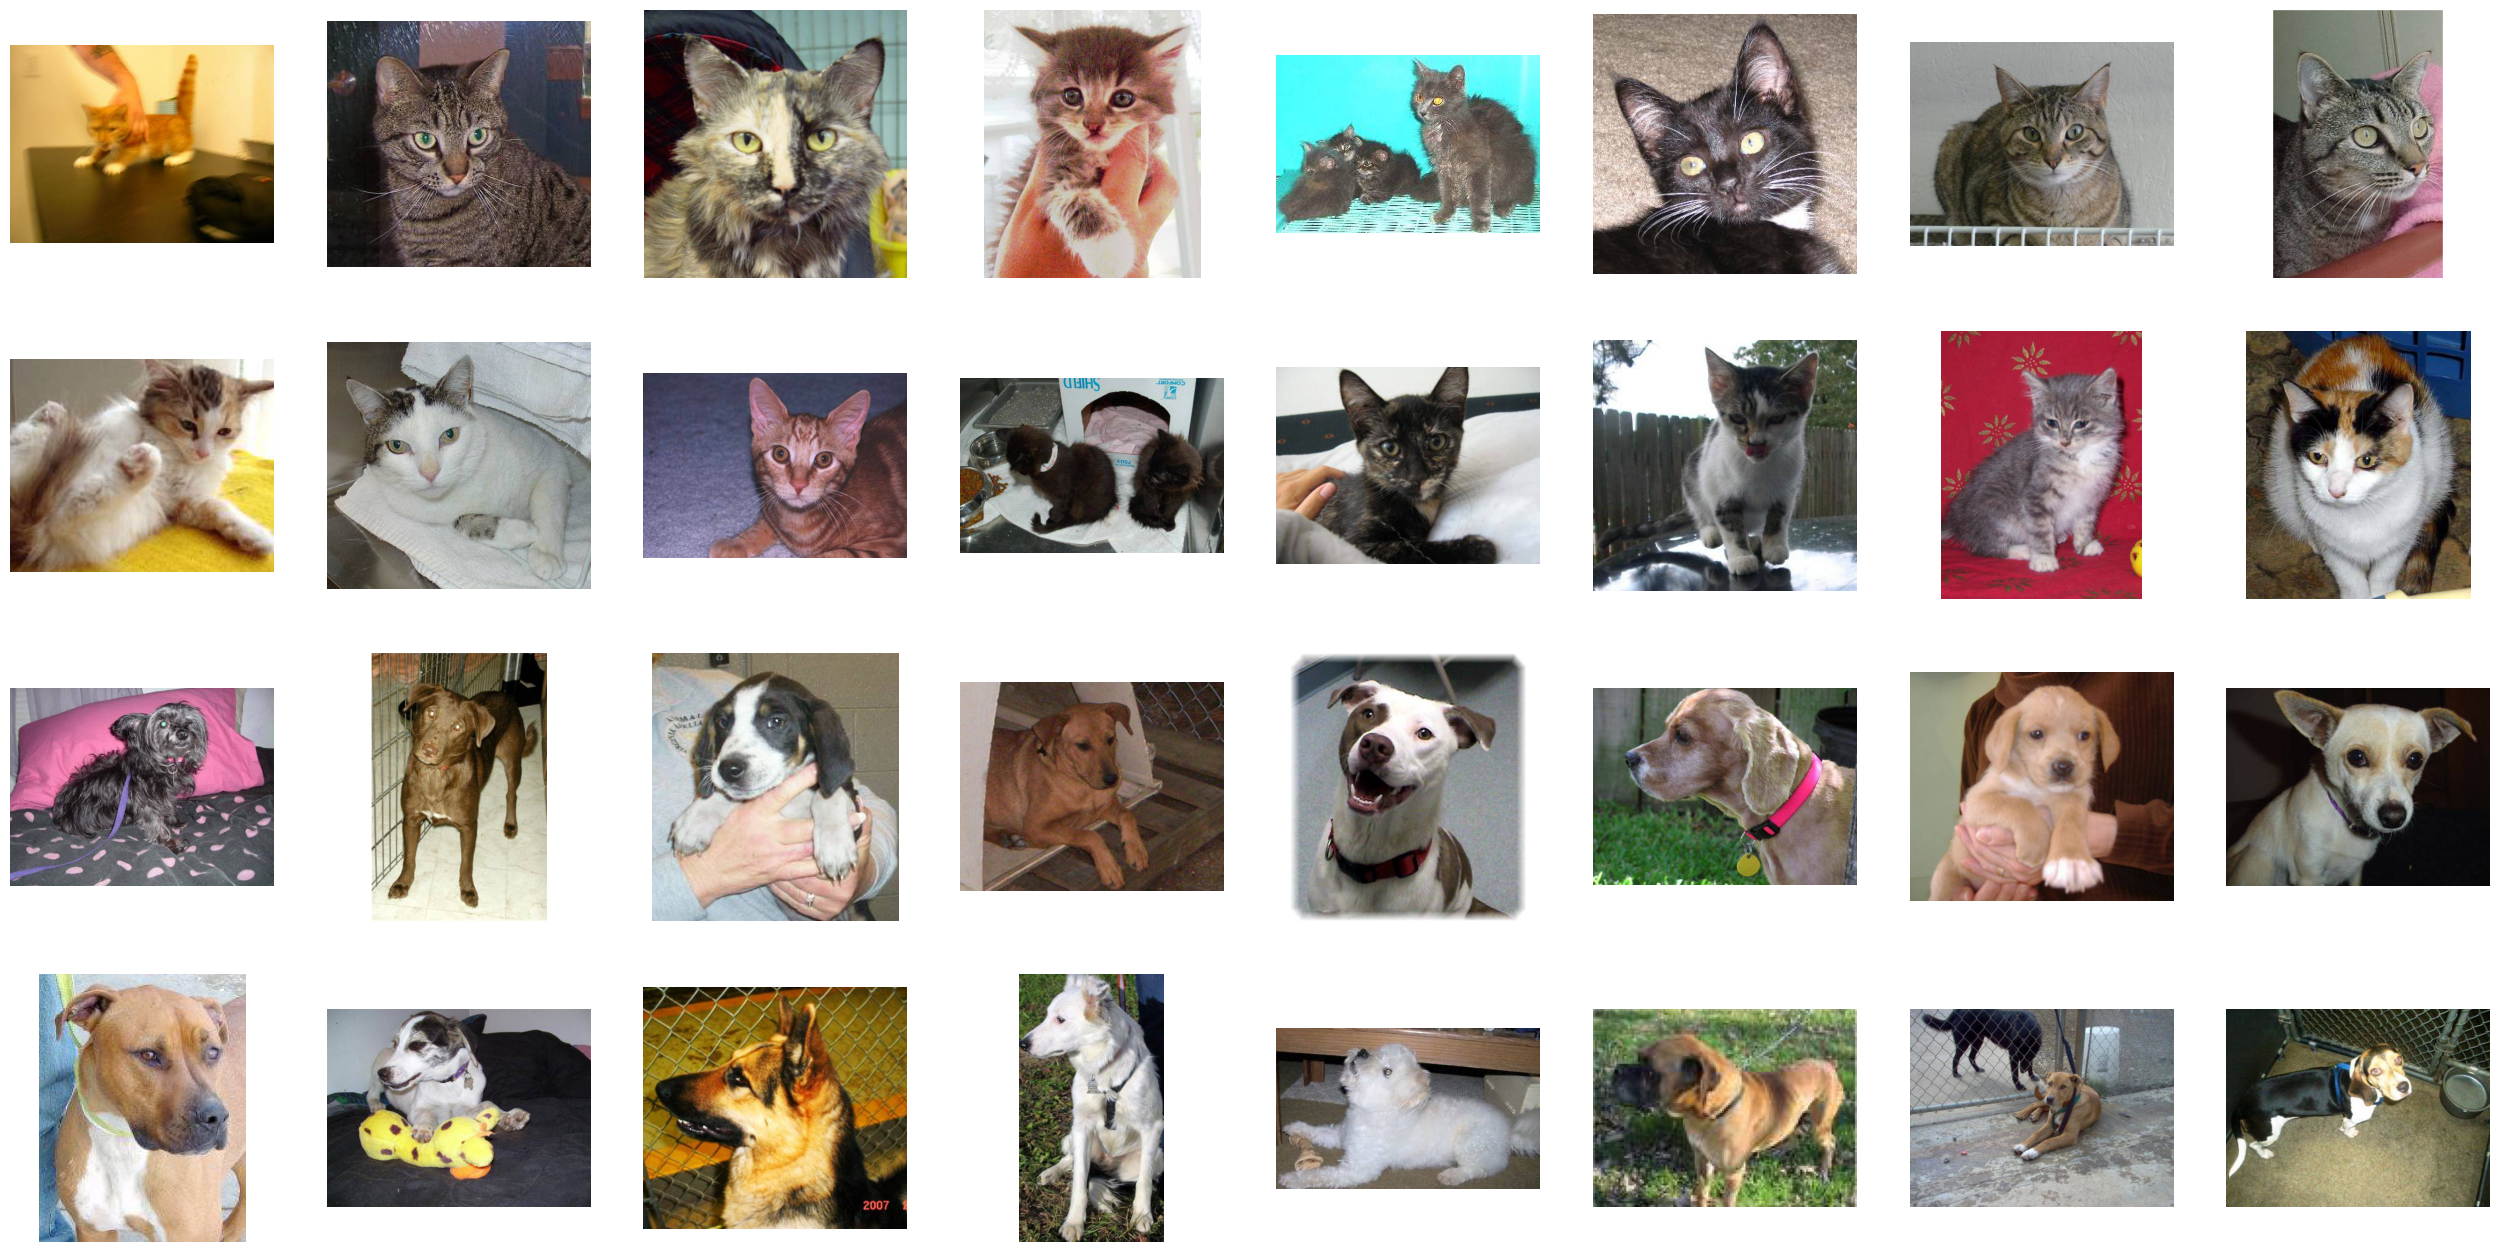

In [23]:
# Mostra les imatges de 16 gats i 16 gossos en matrius de 4x4

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

nrows = 4
ncols = 8

pic_index = 0

fig = plt.gcf()
fig.set_size_inches(ncols * 4, nrows * 4)

pic_index += 16
next_cat_pix = [os.path.join(train_cats_dir, fname) for fname in os.listdir(train_cats_dir)[pic_index-16:pic_index]]
next_dog_pix = [os.path.join(train_dogs_dir, fname) for fname in os.listdir(train_dogs_dir)[pic_index-16:pic_index]]

for i, img_path in enumerate(next_cat_pix+next_dog_pix):
  sp = plt.subplot(nrows, ncols, i + 1)
  sp.axis('Off')

  img = mpimg.imread(img_path)
  plt.imshow(img)

plt.show()


### Pregunta 2
Quàntes neurones tindrem a la capa de sortida?

In [24]:
# Degut a la complexitat del problema i a la mida de les imatges necessitarem una xarxa amb més capes. Això ens
# serveix per augmentar la capacitat del model i per reduïr encara més la mida del mapa de característiques abans
# d'arribar a la capa final. 
# Crea una xarxa neuronal amb 4 capes convolucionals + MaxPooling de 32, 64, 128 i 128 filtres respectivament i
# de mida 3x3 (Conv) i 2x2 (MaxP). Abans de la capa de sortida tindrem una capa densa de 512 neurones. L'entrada
# al nostre model serà de 150x150x3, farem servir imatges a color de 150x150 pixels i cada pixel necessita 3 números
# per poder codificar la profunditat de color en RGB.
#
# Observa amb el mètode summary com els mapes de característiques van reduïnt la seva mida a mesura que avancen
# al llarg de les capes de la xarxa neuronal.
import tensorflow as tf
from tensorflow import keras
from keras import layers
from keras import models
from keras import Sequential

model = Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 74, 74, 32)       0         
 2D)                                                             
                                                                 
 conv2d_9 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 36, 36, 64)       0         
 2D)                                                             
                                                                 
 conv2d_10 (Conv2D)          (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 17, 17, 128)     

In [25]:
# Compil·la el model amb un optimitzador RMSprop amb un learning rate de 0,0001
from keras import optimizers

model.compile(loss='binary_crossentropy', optimizer=optimizers.RMSprop(learning_rate=1e-4), metrics=['acc'])

In [26]:
# El dataset són imatges de diferents mides i amb pixels RGB compresos entre 0 i 255. Per poder
# realitzar l'entrenament necessitem imatges de 150x150 pixels i amb els valors RGB normalitzats
# entre 0 i 1.
#
# Pots realitzar aquesta operació fent servir ImageDataGenerator i aprofitar la jerarquia de directoris
# per definir la classe de cada una de les imatges.
#
# Exemple:
#
# train_datagen = ImageDataGenerator( rescale = 1.0/255. )
# train_generator = train_datagen.flow_from_directory(train_dir,
#                                                     batch_size=20,
#                                                     class_mode='binary',
#                                                     target_size=(150, 150))     
#

from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        train_dir,
        target_size=(150, 150),
        batch_size=20,
        class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(150, 150),
        batch_size=20,
        class_mode='binary')



Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [27]:
# Realitza l'entrenament del model incolent les dades de validació, amb 50 epochs i iguala la sortida
# a la variable "history"

history = model.fit_generator(
        train_generator,
        steps_per_epoch=100,
        epochs=5,
        validation_data=validation_generator,
        validation_steps=50)


Epoch 1/5


D:\Temp\ipykernel_2900\3684627489.py:4: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(


100/100 [==============================] - 11s 108ms/step - loss: 0.6885 - acc: 0.5305 - val_loss: 0.7030 - val_acc: 0.5130
Epoch 2/5
100/100 [==============================] - 11s 107ms/step - loss: 0.6637 - acc: 0.5980 - val_loss: 0.6463 - val_acc: 0.6350
Epoch 3/5
100/100 [==============================] - 11s 108ms/step - loss: 0.6082 - acc: 0.6700 - val_loss: 0.6355 - val_acc: 0.6170
Epoch 4/5
100/100 [==============================] - 11s 106ms/step - loss: 0.5731 - acc: 0.6900 - val_loss: 0.5983 - val_acc: 0.6780
Epoch 5/5
100/100 [==============================] - 11s 107ms/step - loss: 0.5345 - acc: 0.7345 - val_loss: 0.5786 - val_acc: 0.6990


### Pregunta 3
Quina és la precisió amb les dades d'entrenament? I amb les dades de validació?

Una diferència gran entre aquestes dues precisions ens podria estar indicant que s'ha produït sobreentrenament (overfitting).

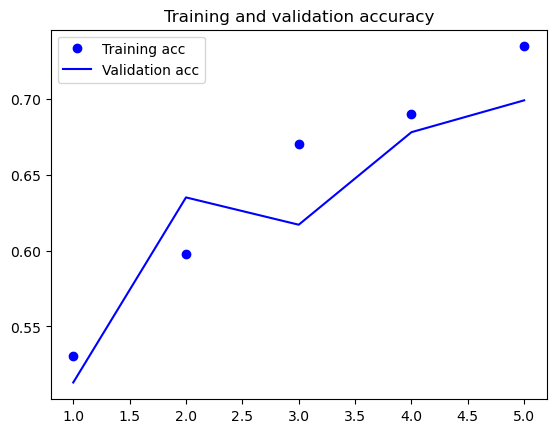

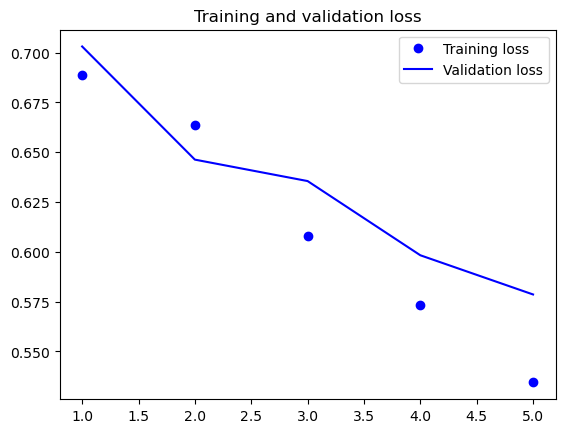

In [28]:
# Fent servir la variable history, mostra un gràfic amb l'evolució de precisió i l'error 
# de les dades d'entrenament i les dades de validació

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()


A les gràfiques podem veure com les linies de la precisió de les dades d'entrenament i de validació es separen aproximadament a partir de l'epoch 5. A la gràfica de l'error, podem observar que mentre amb les dades d'entrenament l'error continua baixant, amb les dades de validació l'error s'estanca.

Això ens està indicant que a partir de aquest moment comença l'overfitting i el model ja no està millorant. És entrenament inútil.

La xarxa treballa bé amb les imatges amb les que ha estat entrenada però el seu rendiment baixa quan ha de fer prediccions amb imatges que no ha vist mai.

Si el resultat és satisfactori podriem aturar l'entrenement en aquest punt i quedar-nos amb el model obtingut. En cas contrari, hauríem de millorar el model o millorar el dataset.

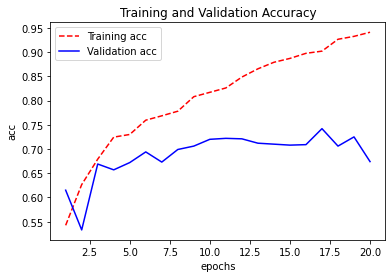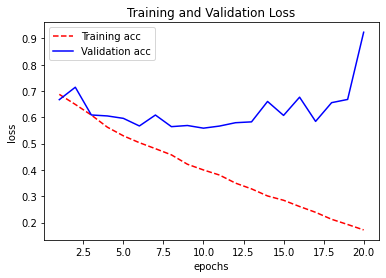

In [48]:
# Crea una miniapp amb un botó que ens permeti escollir una imatge del nostre ordinador,
# mostri aquesta imatge després d'adaptarla i comprobi si es tracta d'un gat o d'un gos.
#
# Després prova amb diferents imatges de gats i gossos obtingudes d'internet o de fotos
# realitzades a la vida real. Si tens mascota és una bona oportunitat per fer proves.

from tkinter import *
from PIL import Image, ImageTk
from tkinter import filedialog
import numpy as np

# Creem el marc principal
app = Tk()
app.title('Reconeixement d\'imatges')
app.geometry('400x400')

# Funció per obrir la finestra de selecció de fitxers
def openFile():
    # Obre la finestra de selecció de fitxers
    filepath = filedialog.askopenfilename(title='Selecciona una imatge')
    # Adaptem el format de la imatge
    load = Image.open(filepath)
    load = load.resize((150, 150), Image.ANTIALIAS)
    render = ImageTk.PhotoImage(load)
    # Mostrem la imatge
    img = Label(app, image=render)
    img.image = render
    img.place(x=150, y=50)
    # Realitzem la predicció
    img = np.array(load)
    img = img.reshape(1, 150, 150, 3)
    img = img / 255
    prediction = model.predict(img)
    # Mostrem el resultat
    if prediction[0][0] < 0.5:
        result = Label(app, text='Gos')
    else:
        result = Label(app, text='Gat')
    result.place(x=150, y=300)
# Creem el botó
btn = Button(app, text='Selecciona una imatge', command=openFile)
btn.place(x=150, y=350)

# Executem l'aplicació
app.mainloop()

1/1 [==============================] - 0s 14ms/step


D:\Temp\ipykernel_2900\180704024.py:23: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use Resampling.LANCZOS instead.
  load = load.resize((150, 150), Image.ANTIALIAS)


1/1 [==============================] - 0s 16ms/step


Repte 5v1: Gat o gos amb *Data Augmentation*


Com menys dades d'entrenament tinguem disponibles, menys possibilitats tindrem d'obtenir prediccions precises. Ara crearem un nou model fent servir tècniques de Data Augmentation. Aquest mètode ens permet generar més imatges a partir de les imatges disponibles fent transformacions aleatòries que ens generin imatges noves.

Aquestes transformacions poden ser operacions com rotar, invertir, voltear, zoom, etc. Ho farem amb la funció ImageDataGenerator del paquet de preprocessat d'imatges de Keras.

In [30]:
# Exemple d'ús
#
# En aquest cas no tindria sentit invertir verticalment la imatge perquè tindriem
# gats i gossos de cap per avall

train_datagen = ImageDataGenerator(
    rescale = 1./255,                     # Normalització dels pixels
    rotation_range = 40,                  # Rotació aleatòria fins a aquest angle
    width_shift_range = 0.2,              # Traslació aleatòria fins al 20% de l'amplada
    height_shift_range = 0.2,             # Traslació aleatòria fins al 20% de l'alçada
    shear_range = 0.2,                     # Transformació aleatòria de tall
    zoom_range = 0.2,                     # Zoom aleatoria fins al 20%
    horizontal_flip = True,               # Efecte mirall horitzontal
    fill_mode = 'nearest'                 # Estrategia per omplir els pixels de nova creació
)

# Genera la variable train_generator
train_generator = train_datagen.flow_from_directory(
        train_dir,
        target_size=(150, 150),
        batch_size=20,
        class_mode='binary')




Found 2000 images belonging to 2 classes.


In [31]:
# Crea un nou model amb la mateixa estructura que en el cas anterior i
# realitza l'entrenament de 100 epochs amb les noves dades

model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy',
                optimizer=optimizers.RMSprop(lr=1e-4),
                metrics=['acc'])
                            
history = model.fit_generator(
        train_generator,
        steps_per_epoch=100,
        epochs=5,
        validation_data=validation_generator,
        validation_steps=50)

Epoch 1/5


c:\Users\informatica\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\rmsprop.py:135: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(RMSprop, self).__init__(name, **kwargs)
D:\Temp\ipykernel_2900\2769283366.py:22: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(


100/100 [==============================] - 17s 164ms/step - loss: 0.6901 - acc: 0.5115 - val_loss: 0.6829 - val_acc: 0.5610
Epoch 2/5
100/100 [==============================] - 15s 154ms/step - loss: 0.6717 - acc: 0.5790 - val_loss: 0.7124 - val_acc: 0.5120
Epoch 3/5
100/100 [==============================] - 15s 152ms/step - loss: 0.6629 - acc: 0.6005 - val_loss: 0.6475 - val_acc: 0.6160
Epoch 4/5
100/100 [==============================] - 14s 138ms/step - loss: 0.6402 - acc: 0.6205 - val_loss: 0.6242 - val_acc: 0.6440
Epoch 5/5
100/100 [==============================] - 14s 139ms/step - loss: 0.6333 - acc: 0.6260 - val_loss: 0.6396 - val_acc: 0.6190


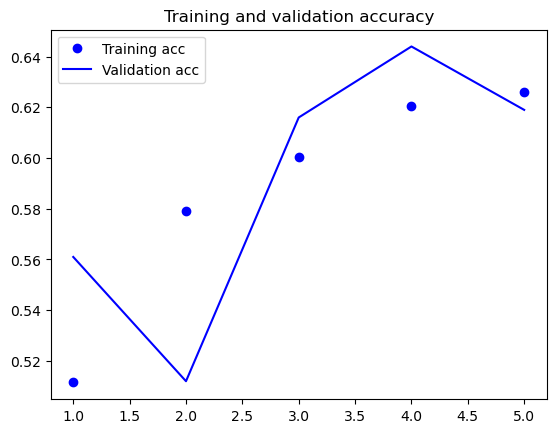

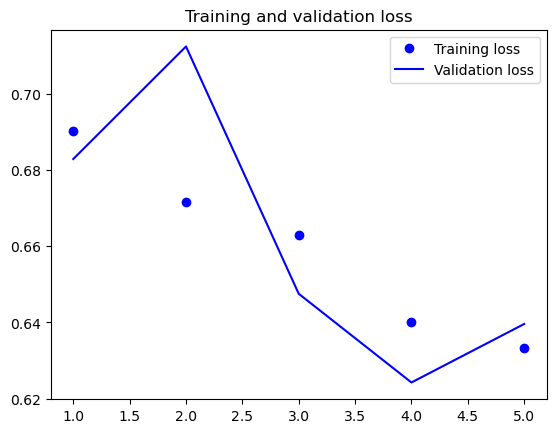

In [32]:
# Mostra el gràfic amb l'evolució de la precisió i l'error de les dades 
# d'entrenament i les dades de validació

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

Pregunta 5:
A partir de quin epoch es produeix el sobreentrenament?


In [33]:
# Fes l'avaluació del model amb les dades de test
test_generator = test_datagen.flow_from_directory(
        test_dir,
        target_size=(150, 150),
        batch_size=20,
        class_mode='binary')

test_loss, test_acc = model.evaluate_generator(test_generator, steps=50)
print('test acc:', test_acc)

Found 1000 images belonging to 2 classes.


D:\Temp\ipykernel_2900\2040725259.py:8: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  test_loss, test_acc = model.evaluate_generator(test_generator, steps=50)


test acc: 0.597000002861023


Repte 5v2: Gat o gos amb *Feature Extraction*

En aquesta versió del model farem servir la tècnica **Transfer Learning** per millorar encara més la precisió del nostre model, en concret l'estratègia **Feature Extraction**. Aprofitarem una xarxa preentrenada anomenada **VGG16** que tenim disponible als paquets de Keras. Aquesta és una CNN entrenada amb 1 milió d'imatges classificades en 1000 classes diferents.

In [34]:
from tensorflow.keras.applications import VGG16

# Creem un model a partir de VGG16
conv_base = VGG16(weights='imagenet', include_top=False, input_shape=(150, 150, 3))

# Mostra un resum de l'estructura de la CNN preentrenada
conv_base.summary()

# Congelem les capes per a que no es modifiquin el pesos durant l'entrenament
conv_base.trainable = False

# Podem crear el modelFE com si la CNN preentrenada fos una capa més. Afegirem
# una capa Flatten i una Dense de 256 neurones abans de la capa de sortida
modelFE = Sequential()
modelFE.add(conv_base)
modelFE.add(layers.Flatten())
modelFE.add(layers.Dense(256, activation='relu'))
modelFE.add(layers.Dense(1, activation='sigmoid'))

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 150, 150, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 150, 150, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 150, 150, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 75, 75, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 75, 75, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 75, 75, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 37, 37, 128)       0     

Pregunta 6:
Per què una part dels paràmetres són no entrenables? A quina part del model corresponen?

In [35]:
# Realitza l'entrenament del nou model amb 100 epochs i learning_rate de 0.0001

modelFE.compile(loss='binary_crossentropy',
                optimizer=optimizers.RMSprop(lr=1e-4),
                metrics=['acc'])

history = modelFE.fit_generator(
        train_generator,
        steps_per_epoch=100,
        epochs=5,
        validation_data=validation_generator,
        validation_steps=50)

Epoch 1/5


D:\Temp\ipykernel_2900\1032442277.py:7: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = modelFE.fit_generator(


100/100 [==============================] - 48s 473ms/step - loss: 0.5392 - acc: 0.7090 - val_loss: 0.3500 - val_acc: 0.8420
Epoch 2/5
100/100 [==============================] - 48s 481ms/step - loss: 0.4107 - acc: 0.8160 - val_loss: 0.3380 - val_acc: 0.8440
Epoch 3/5
100/100 [==============================] - 48s 476ms/step - loss: 0.3828 - acc: 0.8275 - val_loss: 0.2658 - val_acc: 0.8910
Epoch 4/5
100/100 [==============================] - 47s 475ms/step - loss: 0.3734 - acc: 0.8250 - val_loss: 0.3092 - val_acc: 0.8590
Epoch 5/5
100/100 [==============================] - 52s 517ms/step - loss: 0.3554 - acc: 0.8350 - val_loss: 0.2651 - val_acc: 0.8940


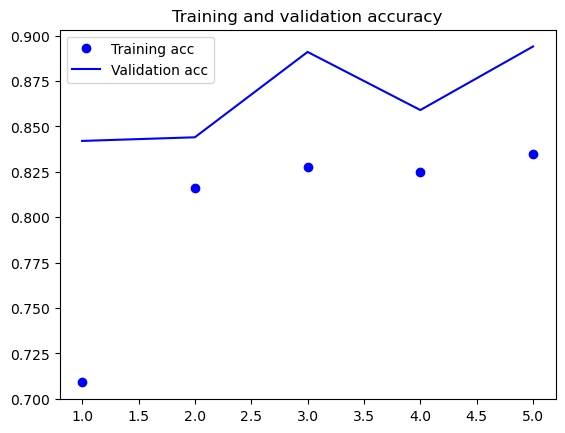

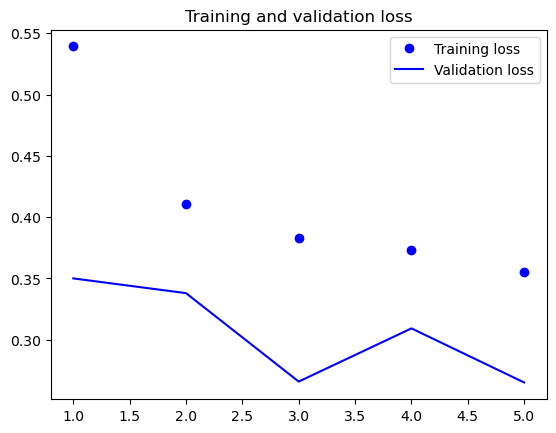

In [36]:
# Mostra el gràfic amb l'evolució de la precisió i l'error de les dades 
# d'entrenament i les dades de validació

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

Pregunta 7
A partir de quin epoch es produeix el sobreentrenament?

In [37]:
# Fes l'avaluació del model amb les dades de test
test_generator = test_datagen.flow_from_directory(
        test_dir,
        target_size=(150, 150),
        batch_size=20,
        class_mode='binary')

test_loss, test_acc = modelFE.evaluate_generator(test_generator, steps=50)
print('test acc:', test_acc)

Found 1000 images belonging to 2 classes.


D:\Temp\ipykernel_2900\2334457840.py:8: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  test_loss, test_acc = modelFE.evaluate_generator(test_generator, steps=50)


test acc: 0.8840000033378601


Repte 5v3: Gat o gos amb *Fine-Tuning*

In [38]:
# Crea un nou model a partir del model pre-entrenat VGG16 i entrena'l amb la
# tècnica Fine-Tuning. Has de introduir el valor True el paràmetre layer.trainable
# de totes les capes 'block5'. Pots fer servir layer.name. En total hauries de tenir
# al voltant de 9M de paràmetres entrenables

conv_base.trainable = True

set_trainable = False
for layer in conv_base.layers:
    if layer.name == 'block5_conv1':
        set_trainable = True
    if set_trainable:
        layer.trainable = True
    else:
        layer.trainable = False

modelFE.compile(loss='binary_crossentropy',
                optimizer=optimizers.RMSprop(lr=1e-5),
                metrics=['acc'])

In [39]:
# Entrena el model durant 100 epochs
history = modelFE.fit_generator(
        train_generator,
        steps_per_epoch=100,
        epochs=5,
        validation_data=validation_generator,
        validation_steps=50)

Epoch 1/5


D:\Temp\ipykernel_2900\2158419354.py:2: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = modelFE.fit_generator(


100/100 [==============================] - 56s 550ms/step - loss: 0.2978 - acc: 0.8730 - val_loss: 0.2271 - val_acc: 0.9030
Epoch 2/5
100/100 [==============================] - 53s 527ms/step - loss: 0.2717 - acc: 0.8865 - val_loss: 0.2418 - val_acc: 0.9010
Epoch 3/5
100/100 [==============================] - 53s 527ms/step - loss: 0.2561 - acc: 0.8840 - val_loss: 0.1982 - val_acc: 0.9200
Epoch 4/5
100/100 [==============================] - 57s 566ms/step - loss: 0.2391 - acc: 0.9035 - val_loss: 0.1899 - val_acc: 0.9260
Epoch 5/5
100/100 [==============================] - 55s 546ms/step - loss: 0.2148 - acc: 0.9100 - val_loss: 0.1831 - val_acc: 0.9270


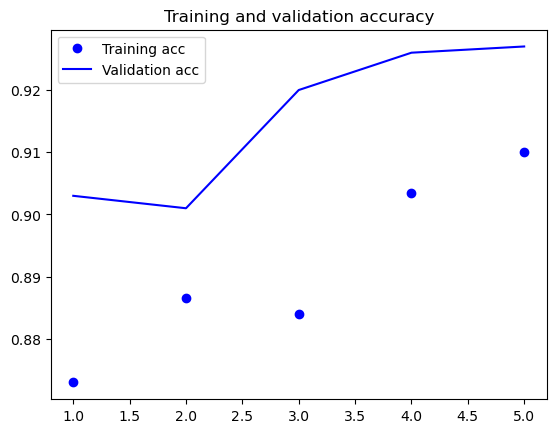

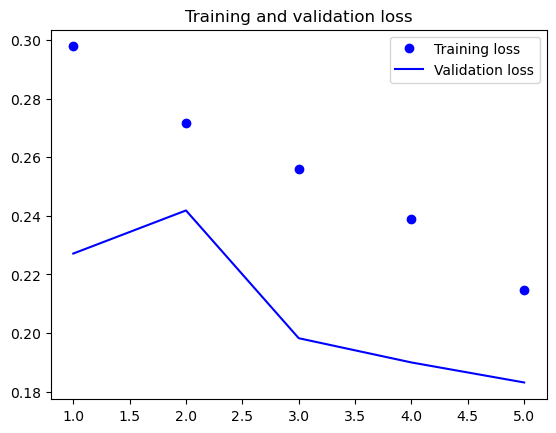

In [40]:
# Mostra el gràfic amb l'evolució de la precisió i l'error de les dades 
# d'entrenament i les dades de validació

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [41]:
# Fes l'avaluació del model amb les dades de test

test_generator = test_datagen.flow_from_directory(
        test_dir,
        target_size=(150, 150),
        batch_size=20,
        class_mode='binary')

test_loss, test_acc = model.evaluate_generator(test_generator, steps=50)
print('test acc:', test_acc)

Found 1000 images belonging to 2 classes.


D:\Temp\ipykernel_2900\1751386148.py:9: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  test_loss, test_acc = model.evaluate_generator(test_generator, steps=50)


test acc: 0.597000002861023


Pregunta 8
Quina ha estat la precisió amb cada un dels models?

Com guardem els models creats?

Com hauràs pogut comprovar, els models que estem creant són cada cop més complexes i triguen més en realitzar l'entrenament. És per això que en certes situacions ens interesarà guardar el model per recuperar-lo en un altre moment.

In [42]:
# Guarda en un fitxer el model que millor ha realitzat les prediccions fent servir
# la funció save(). Aquesta funció fa servir el format hdf5.

modelFE.save('cats_and_dogs_small_2.h5')

# Crea un model nou amb un altre nom i carrega la configuració del model guardat
# al fitxer fent servir la funció load_model() de la llibreria keras.models

modelFE2 = models.load_model('cats_and_dogs_small_2.h5')

In [46]:
# Crea una miniapp com l'anterior però amb el model final que acabes de recuperar
# Creem el marc principal
app = Tk()
app.title('Reconeixement d\'imatges')
app.geometry('400x400')

# Funció per obrir la finestra de selecció de fitxers
def openFile():
    # Obre la finestra de selecció de fitxers
    filepath = filedialog.askopenfilename(title='Selecciona una imatge')
    # Adaptem el format de la imatge
    load = Image.open(filepath)
    load = load.resize((150, 150), Image.ANTIALIAS)
    render = ImageTk.PhotoImage(load)
    # Mostrem la imatge
    img = Label(app, image=render)
    img.image = render
    img.place(x=150, y=50)
    # Realitzem la predicció
    img = np.array(load)
    img = img.reshape(1, 150, 150, 3)
    img = img / 255
    prediction = modelFE.predict(img)
    # Mostrem el resultat
    print(prediction)
    if prediction[0][0] < 0.5:
        result = Label(app, text='Gat')
    else:
        result = Label(app, text='Gos')
    result.place(x=150, y=300)
# Creem el botó
btn = Button(app, text='Selecciona una imatge', command=openFile)
btn.place(x=150, y=350)

# Executem l'aplicació
app.mainloop()

1/1 [==============================] - 0s 52ms/step


D:\Temp\ipykernel_2900\741258107.py:13: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use Resampling.LANCZOS instead.
  load = load.resize((150, 150), Image.ANTIALIAS)


[[0.01725548]]
1/1 [==============================] - 0s 47ms/step
[[0.9998179]]
